Fronteira de Decisão do SVM com Kernel Linear

In [3]:
from sklearn import datasets, model_selection, svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2, :2]  # duas features e duas classes
y = y[y != 2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# modelo SVM
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

def plota_fronteira(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Fronteira de Decisão do SVM com Kernel Linear')


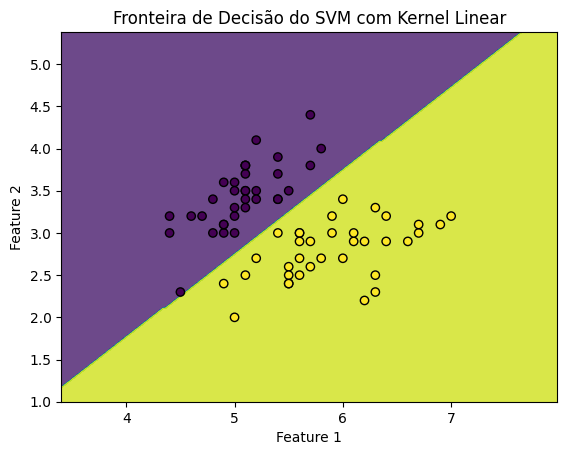

In [4]:
plota_fronteira(X_train, y_train, clf)
plt.show()

## Regressão linear para imputação de dados ausentes em apenas 1 coluna

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Exemplo de DataFrame com dados ausentes
data = {
    'X1': [1, np.nan, 3, 4, 5, np.nan, 7, 8, 9, 10],
    'X2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'X3': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

df = pd.DataFrame(data)

# Separar dados completos e incompletos
complete_data = df.dropna()  # Dados sem valores ausentes
incomplete_data = df[df['X1'].isna()]  # Dados com valores ausentes

# Treinar o modelo de regressão múltipla
X_train = complete_data[['X2', 'X3']]  # Variáveis independentes
y_train = complete_data['X1']  # Variável dependente

model = LinearRegression()
model.fit(X_train, y_train)

# Prever os valores ausentes
X_test = incomplete_data[['X2', 'X3']]
predicted_values = model.predict(X_test)

# Preencher os valores ausentes no DataFrame
df.loc[df['X1'].isna(), 'X1'] = predicted_values

print(df)

     X1   X2    X3
0   1.0   10   100
1   2.0   20   200
2   3.0   30   300
3   4.0   40   400
4   5.0   50   500
5   6.0   60   600
6   7.0   70   700
7   8.0   80   800
8   9.0   90   900
9  10.0  100  1000


## Multiplas colunas com dados ausentes

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Exemplo de DataFrame com dados ausentes
data = {
    'X1': [1, 2, 3, 4, 5, np.nan, 7, 8, 9, 10],
    'X2': [10, 20, 30, 40, 50, 60, 70, 80, np.nan, 100],
    'X3': [np.nan, np.nan, 300, 400, 500, 600, 700, 800, 900, 1000]
}

df = pd.DataFrame(data)
display(df)

,X1,X2,X3
0,1.0,10.0,NaN
1,2.0,20.0,NaN
2,3.0,30.0,300.0
3,4.0,40.0,400.0
4,5.0,50.0,500.0
5,NaN,60.0,600.0
6,7.0,70.0,700.0
7,8.0,80.0,800.0
8,9.0,NaN,900.0
9,10.0,100.0,1000.0


In [ ]:

# Função para imputar valores ausentes usando regressão múltipla
def impute_with_regression(df, feature_alvo, metric):
    # Separa os dados
    complete_data = df.dropna(subset=[feature_alvo])  # Dados sem valores ausentes na coluna alvo
    incomplete_data = df[df[feature_alvo].isna()]  # Dados com valores ausentes na coluna alvo

    # Verificar se há dados suficientes para treinar o modelo
    if len(complete_data) < 2:
        print(f"Não há dados suficientes para treinar o modelo para a coluna : {feature_alvo}.")
        return None

    # features independentes
    feature_independente = [col for col in df.columns if col != feature_alvo]
    X_train = complete_data[feature_independente]  # Variáveis independentes
    y_train = complete_data[feature_alvo]  # Variável dependente

    # Preenche valores ausentes nas features independentes
    imputer = SimpleImputer(strategy=metric)  # metric: 'mean', 'median' ou 'most_frequent'
    X_train_imputed = imputer.fit_transform(X_train)

    # Treinamento do modelo
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)

    X_test = incomplete_data[feature_independente]
    X_test_imputed = imputer.transform(X_test)

    # Previsão do modelo
    predicted_values = model.predict(X_test_imputed)

    # Preenche valores ausentes
    df.loc[df[feature_alvo].isna(), feature_alvo] = predicted_values

    return df


In [ ]:
for feature in df.columns:
    if df[feature].isna().any():  # checa valores ausentes
        df = impute_with_regression(df, feature, 'median')

display(df)

,X1,X2,X3
0,1.000000,10.00000,99.827565
1,2.000000,20.00000,199.878330
2,3.000000,30.00000,300.000000
3,4.000000,40.00000,400.000000
4,5.000000,50.00000,500.000000
5,6.064693,60.00000,600.000000
6,7.000000,70.00000,700.000000
7,8.000000,80.00000,800.000000
8,9.000000,89.91455,900.000000
9,10.000000,100.00000,1000.000000


## Implementação da Técnica de Binning (Agrupamento)

In [ ]:
import pandas as pd

data = {'Idade': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]}
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 80, 100]
labels = ['Jovem', 'Adulto', 'Meia-idade', 'Idoso', 'Terceira idade']

df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels)

display(df)

,Idade,Faixa Etária
0,5,Jovem
1,15,Jovem
2,25,Adulto
3,35,Adulto
4,45,Meia-idade
5,55,Meia-idade
6,65,Idoso
7,75,Idoso
8,85,Terceira idade
9,95,Terceira idade


## Tranformações

In [ ]:
# Padronização Z-Score

import numpy as np
from sklearn.preprocessing import StandardScaler

# Dados de exemplo
data = np.array([[1, 2], [3, 4], [5, 6]])

# Aplicar padronização
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

print("Dados padronizados:\n", data_standardized)

Dados padronizados:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
